## The Sparks Foundation: Graduate Rotational Internship Program
### Data Science & Business Analytics Intern
### Author: Aslam Khan
### Task 1: Prediction using Supervised ML
The task is to predict the percentage of a student based on the number of study hours. This task consist of two variables 'the number of hours studied' (predictor variable) and 'the percentage of student' (output variable). We can use Simple Linear Regression to solve this task.

### Simple Linear Regression

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other.

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error are as small as possible. Error is the distance between the point to the regression line.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
%matplotlib inline

## Load  Dataset:

In [2]:
stud = pd.read_csv('student_scores - student_scores.csv')

## Explore the dataset:

In [3]:
print(stud.shape)
stud.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Description of the Data:

In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
stud.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Counting the number of missing values in the dataset:

In [6]:
stud.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization:

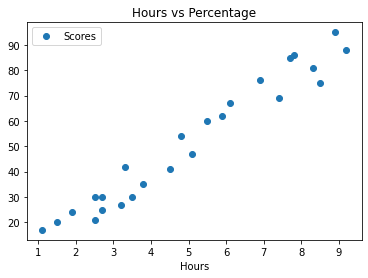

In [7]:
stud.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.show()

## Separate the predictors and the labels:

In [8]:
X = stud.drop("Scores",axis=1)
Y = stud["Scores"].copy()

## Split into train and test set:

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
X_train.shape, X_test.shape

((20, 1), (5, 1))

## Model building and training:

### (Logistic Regression)

In [10]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_prediction = model.predict(X_train)
Y_test_prediction = model.predict(X_test)

## Evaluation:

- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

For simplicity here, we have chosen the Mean Square Error. There are many such metrics-

In [11]:
print("*Training Data*")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_train_prediction)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_train_prediction))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_train_prediction)),"\n")

print("*Test Data*")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_test_prediction)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_test_prediction))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_prediction)))

*Training Data*
Mean Absolute Error: 5.186601709180371
Mean Squared Error: 30.89818237731452
Root mean squared Error: 5.558613350226342 

*Test Data*
Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root mean squared Error: 4.647447612100367


## Training Data

Actual Vs Predicted Value:

In [12]:
dict1={"Actual":Y_train,"Predicted":Y_train_prediction}
new_data=pd.DataFrame(dict1)
new_data=new_data.reset_index(drop=1)
new_data.head()

,Actual,Predicted
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882


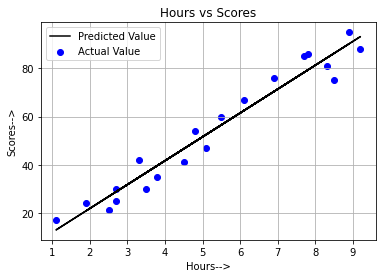

In [13]:
plt.scatter(X_train,Y_train,label="Actual Value",color="blue")
plt.plot(X_train,Y_train_prediction,label="Predicted Value",color="black")
plt.xlabel("Hours-->")
plt.ylabel("Scores-->")
plt.title("Hours vs Scores")
plt.grid(True)
plt.legend();

## Test Data

Actual Vs Predicted Value:

In [14]:
dict2={"Actual":Y_test,"Predicted":Y_test_prediction}
new_data=pd.DataFrame(dict2)
new_data=new_data.reset_index(drop=1)
new_data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


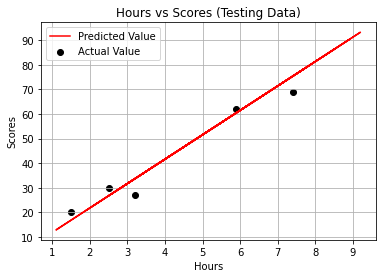

In [15]:
plt.scatter(X_test,Y_test,label="Actual Value",color="black")
plt.plot(X_train,Y_train_prediction,label="Predicted Value",color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Testing Data)")
plt.grid(True)
plt.legend();

In [16]:
warnings.filterwarnings('ignore')

## Predicted score:

In [17]:
#predicted score if a student studies for 9.25 hrs/ day

result=model.predict([[9.25]])
print("The Predicted score of student comes to be {:.3f} if a student studies for 9.25 hrs/ day.".format(result[0]))

The Predicted score of student comes to be 93.692 if a student studies for 9.25 hrs/ day.
